## The purpose of this homework is to implement Canny Edge Detector

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from skimage.io import imread
from skimage.transform import resize
from scipy.ndimage.filters import gaussian_filter
from tqdm import tqdm

In [14]:
from skimage.color import rgb2gray
from scipy.signal import convolve2d
from scipy import ndimage
import cv2

### As you know from theory, Canny Edge Detection algorithm is composed of 4 steps: 
- Bluring the image to suppress the noise
- Calculation of the gradient and the magnitude of the image-gradient
- Non-maximum suppression
- Hystersis thresholding

#### At first let's read and visualize an image.

In [15]:
img = imread('tree.jpg')/255.
img = resize(img, (240, 320), preserve_range=True)
img = rgb2gray(img)

<IPython.core.display.Javascript object>


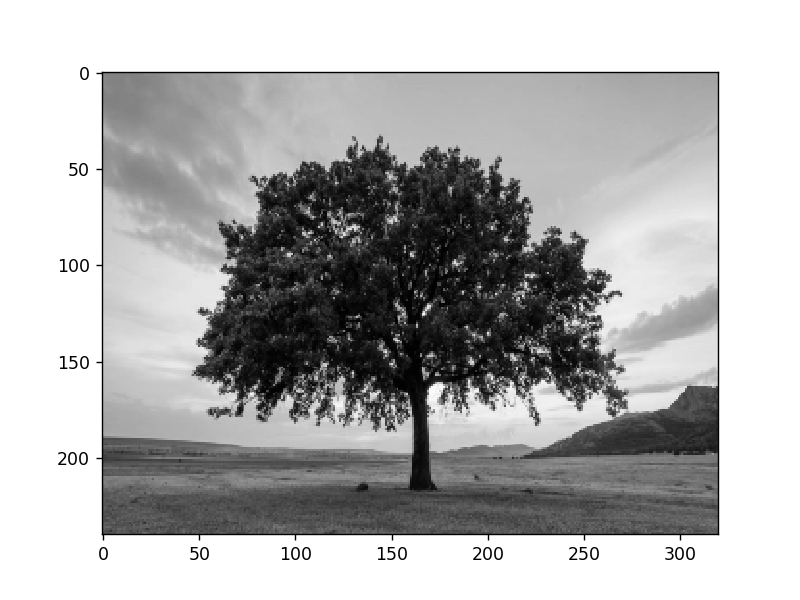

In [16]:
plt.imshow(img, cmap = 'gray')

In order to suppress the noise in the image, we apply bluring.

### Step 1: Gaussian blur

<IPython.core.display.Javascript object>


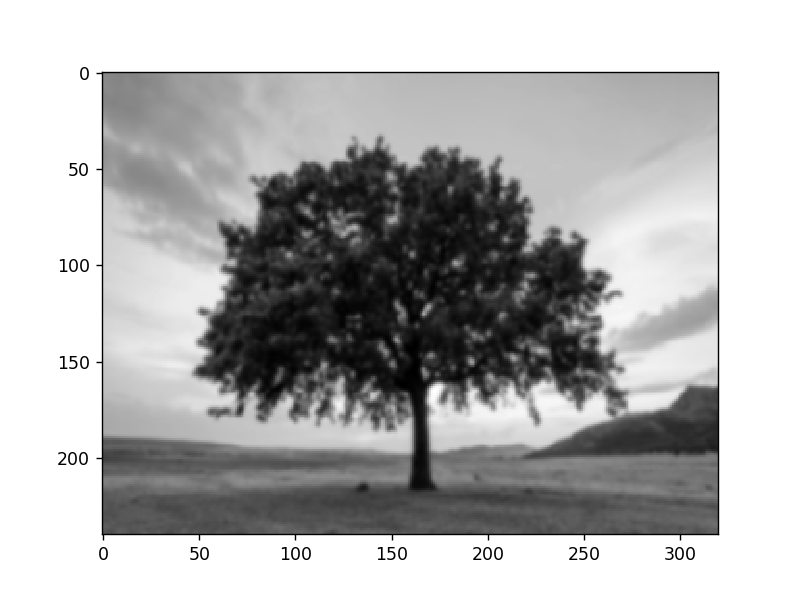

In [20]:
# from scipy.signal import gaussian, sobel

smooth_img = ndimage.gaussian_filter(img, sigma=1) # TODO get gaussian blured image with some sigma and kernel size
plt.imshow(smooth_img, cmap = 'gray')
plt.show()

### Step 2: Gradient Calculation

In [23]:
G_x, G_y = ndimage.sobel(img, axis = -1), ndimage.sobel(img, axis = 0) # TODO Calculate the gradient of the image
M = np.hypot(G_x, G_y) # TODO Compute the magnitude of the image gradient
M = M/M.max()

<IPython.core.display.Javascript object>


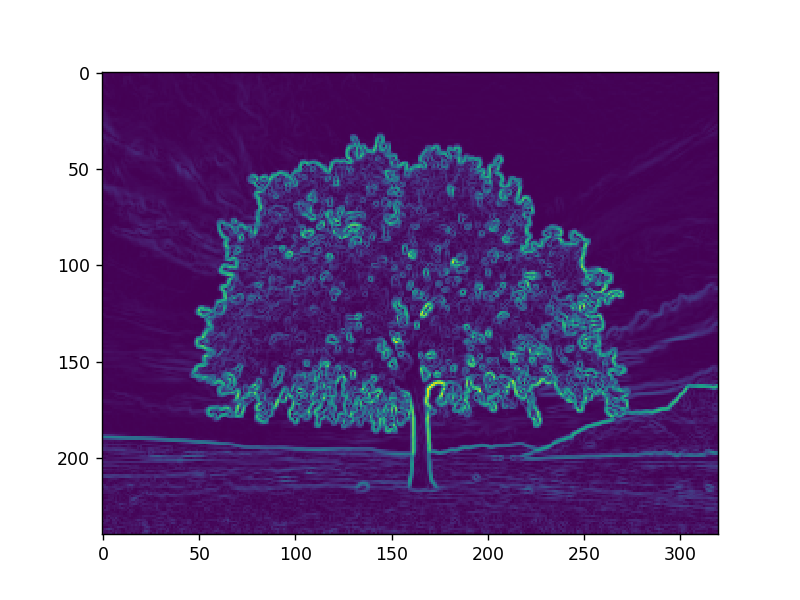

In [24]:
plt.imshow(M)

### Step 3: Non-Maximum Suppression

In [242]:
# TODO Implement non-maximum suppression algorithm

#### Note !!! for implementation of non-maximum suppression you can follow the following steps, but your own implementation is also applicable.

Defining four directions

In [25]:
d_x = (1, 1/np.sqrt(2), 0, 1/np.sqrt(2))
d_y = (0, 1/np.sqrt(2), 1, -1/np.sqrt(2))
D = np.array([[d_x[i], d_y[i]] for i in range(4)])

In [27]:
D

array([[ 1.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 0.        ,  1.        ],
       [ 0.70710678, -0.70710678]])

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

def min_index(pixel):
    """
    Closest direction calculation
    -----------
    Parameters:
        pixel (tuple or 1d array)
    Returns:
        int (index of closest direction on D directions array)
    """
    temp = []
    for i in range(4):
        temp.append(cosine_similarity([D[i]], [pixel])[0, 0])
    return np.argmax(temp)

In [30]:
# A = 
# TODO Obtain a matrix of shape (img.shape[0], img.shape[1]), 
# for which A[i,j] is the number of the closest direction from D in the point (i,j). 
# For example, if the direction D[1,:] is the closest to the gradient of the image in the point (i,j), 
# i.e. G[i,j,:], then A[i,j] = 1.

In [31]:
A = np.zeros((smooth_img.shape[0], smooth_img.shape[1]))
for i in tqdm(range(smooth_img.shape[0])):
    for j in range(smooth_img.shape[1]):
        A[i, j] = min_index([G_x[i, j], G_y[i, j]])
A = A.astype(int)

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [01:43<00:00,  2.35it/s]


In [32]:
res = np.zeros((smooth_img.shape[0], smooth_img.shape[1]))
M_pad = np.zeros((smooth_img.shape[0]+2, smooth_img.shape[1]+2))
M_pad[1:-1,1:-1] = M.copy()
for i in tqdm(range(smooth_img.shape[0])):
    for j in range(smooth_img.shape[1]):
        tq = min_index(D[A[i, j]])
        if tq == 0: #0 is E-W (horizontal)
            M_p = M_pad[i+1, j]
            M_n = M_pad[i+1, j+2]
        if tq == 1: #1 is NE-SW
            M_p = M_pad[i, j+2]
            M_n = M_pad[i+2, j]
        if tq == 2: #2 is N-S (vertical)
            M_p = M_pad[i, j+1]
            M_n = M_pad[i+2, j+1]
        if tq == 3: #3 is NW-SE
            M_p = M_pad[i, j]
            M_n = M_pad[i+2, j+2]
            
        if M_pad[i,j] >= M_p and M_pad[i,j] >= M_n:
            res[i,j] = M_pad[i,j]

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [01:49<00:00,  2.19it/s]


<IPython.core.display.Javascript object>


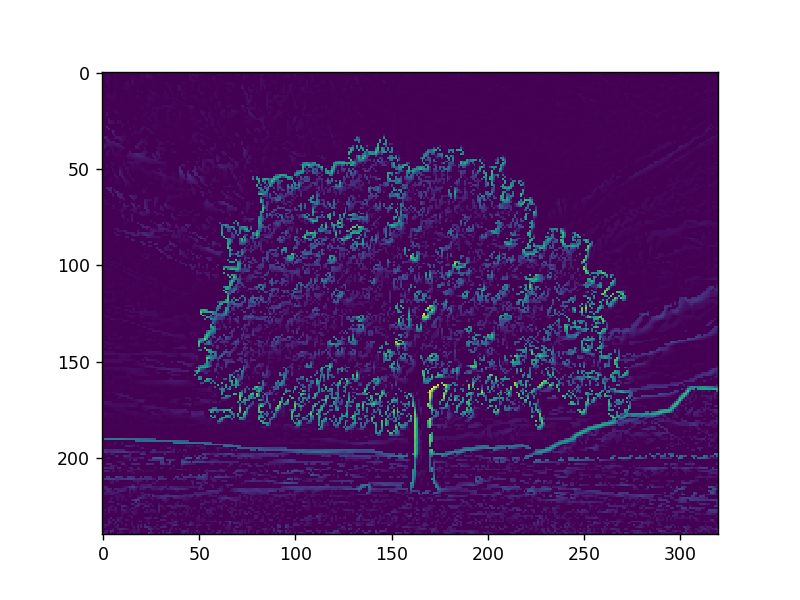

In [33]:
plt.imshow(res)

### Step 4: Hystersis Thresholding

In [248]:
def hyst(img, t_h, t_l):    
    # TODO Implement the hystersis thresholding with high threshold t_h, low threshold t_l
    return 

In [249]:
can_res = hyst(res, 0.2, 0.05)

<IPython.core.display.Javascript object>


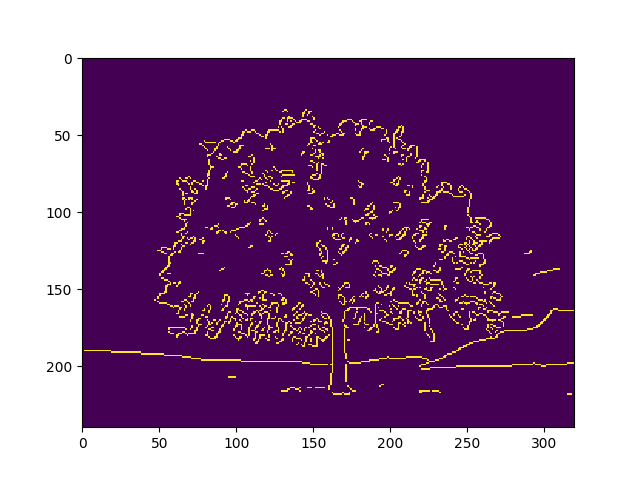

In [250]:
plt.imshow(can_res)